<a href="https://colab.research.google.com/github/zahraDehghanian97/SCINet/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/MCIRD_aaic2021_train.csv', header=0)

In [ ]:
df.head()

,day,subscriber_ecid,subscriber_gender,subscriber_age,registration_province,months_of_subscription,most_used_province,is_usage_nonzero,subscriber_total_expenses,nonpackage_voice_expenses,package_voice_noncash_expenses,is_voice_expenses_nonzero,is_voice_usage_nonzero,call_in_network_duration,call_off_netwrok_duration,nonpackage_call_in_network_expenses,nonpackage_call_off_network_expenses,total_call_duration,#inter_operator_calls,xyz_score,hxr_score,data_cash_expenses,nonpackage_data_expenses,package_data_noncash_expenses,subscriber_data_expenses,subscriber_nondata_expenses,data_usage_volume,is_data_expenses_nonzero,is_data_usage_nonzero,#activated_monthly_data_packages,#activated_short_term_data_packages,#activated_type_one_data_packages,#activated_type_two_data_packages,#activated_type_three_data_packages
0,(n)01,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.132373,-0.072802,0.0,1,1,-0.155626,0.0,-0.256454,0.0,-0.220797,0.0,0.031219,38.192862,0.0,0.0,0.0,0.0,-0.104687,0.072258,0,1,0,0,0,0,0
1,(n)02,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.122445,-0.060440,0.0,1,1,-0.142857,0.0,0.036145,0.0,-0.210668,0.0,0.033491,38.144232,0.0,0.0,0.0,0.0,-0.092861,0.049563,0,1,0,0,0,0,0
2,(n)03,-06FoayTOXJ8-,1,36.0,8,188,8,1,0.343066,0.519231,0.0,1,1,0.418196,0.0,0.762478,0.0,0.264686,0.0,0.036831,37.990377,0.0,0.0,0.0,0.0,0.461665,-0.013977,0,0,0,0,0,0,0
3,(n)04,-06FoayTOXJ8-,1,36.0,8,188,8,1,1.869763,2.420329,0.0,1,1,2.259377,0.0,3.144579,0.0,1.821742,0.0,0.039942,37.777398,0.0,0.0,0.0,0.0,2.280301,0.000403,0,1,0,0,0,0,0
4,(n)05,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.233858,-0.199176,0.0,1,1,-0.277733,0.0,-0.137693,0.0,-0.324105,0.0,0.042694,37.545275,0.0,0.0,0.0,0.0,-0.225579,0.016209,0,1,0,0,0,0,0


In [ ]:
df1 = df[['subscriber_ecid', 'data_usage_volume']]

In [ ]:
df1.head()

,subscriber_ecid,data_usage_volume
0,-06FoayTOXJ8-,0.072258
1,-06FoayTOXJ8-,0.049563
2,-06FoayTOXJ8-,-0.013977
3,-06FoayTOXJ8-,0.000403
4,-06FoayTOXJ8-,0.016209


خیلی از مقادیر دیتاست -0.0139766307813943 این هستن و میشه به راحتی اینارو جایگزین کرد

In [ ]:
unique_sub_id = set(df1['subscriber_ecid'].values)

In [ ]:
len(unique_sub_id)

100

In [ ]:
# df_array = df1.values

In [ ]:
import numpy as np

In [ ]:
# df_array[0][0]

In [ ]:
data_list = []
for sub_id in unique_sub_id:
    # print(sub_id)
    temp = df1[df1['subscriber_ecid']==sub_id].values
    if temp.shape[0] < 69:
        print(temp.shape)
        print(sub_id)
    else:
        data_list.append(temp)

(61, 2)
0o-xDa8uTNBGu
(1, 2)
37v4v4PPObMC_
(22, 2)
-gjfIaG2oxwzj
(2, 2)
28gWxNYMU_2dg
(68, 2)
-DgEYYT0gqMqr
(1, 2)
32ez6CX89v6KZ
(67, 2)
-XU6p4P-782mp
(18, 2)
1EN04BS-9nKgc
(53, 2)
0T7ixhiDdZ8TL
(60, 2)
-QXHomYaJxYXi


In [ ]:
# for i in data_list:
#     print(i.shape)

In [ ]:
# training_set_scaled = train_data.iloc[:, :].values

In [ ]:
X = []
y = []
mem_step = 14

for item in data_list:
  for i in range(mem_step, 69):
      X.append(item[i-mem_step:i, 1:2])
      # print(item[i-mem_step:i, 1:2])
      y.append(item[i, 1:2])

X, y = np.array(X), np.array(y)

In [ ]:
X, y = X.astype('float32'), y.astype('float32')

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# check GPU availability
print("GPU is available :)" if tf.config.list_physical_devices("GPU") else "Not available :(")

import warnings
warnings.filterwarnings("ignore")

GPU is available :)


In [ ]:
keras_reg = Sequential()

keras_reg.add(LSTM(units = 64, return_sequences = True, input_shape = (X.shape[1], 1)))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 16))
keras_reg.add(Dropout(0.2))

# keras_reg.add(Dense(units=32, activation='relu' ))
keras_reg.add(Dense(units=16, activation='relu' ))
keras_reg.add(Dense(units = 1))

In [ ]:
keras_reg.compile(optimizer = 'adam',
                  loss = 'mean_squared_error',
                  metrics='mse')
# keras_reg.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [ ]:
history = keras_reg.fit(X_train, y_train,
                        validation_split=0.2,
                        shuffle=False,
                        epochs = 30,
                        verbose = 1)

Epoch 1/30
25/25 [==============================] - 19s 197ms/step - loss: 35.6576 - mse: 35.6576 - val_loss: 8.0471 - val_mse: 8.0471
Epoch 2/30
25/25 [==============================] - 1s 38ms/step - loss: 33.4023 - mse: 33.4023 - val_loss: 7.1625 - val_mse: 7.1625
Epoch 3/30
25/25 [==============================] - 1s 44ms/step - loss: 32.1767 - mse: 32.1767 - val_loss: 6.8131 - val_mse: 6.8131
Epoch 4/30
25/25 [==============================] - 1s 28ms/step - loss: 31.8303 - mse: 31.8303 - val_loss: 6.5565 - val_mse: 6.5565
Epoch 5/30
25/25 [==============================] - 1s 29ms/step - loss: 31.0379 - mse: 31.0379 - val_loss: 6.2439 - val_mse: 6.2439
Epoch 6/30
25/25 [==============================] - 1s 28ms/step - loss: 31.3729 - mse: 31.3729 - val_loss: 6.1172 - val_mse: 6.1172
Epoch 7/30
25/25 [==============================] - 1s 26ms/step - loss: 31.5562 - mse: 31.5562 - val_loss: 6.1829 - val_mse: 6.1829
Epoch 8/30
25/25 [==============================] - 1s 27ms/step - 

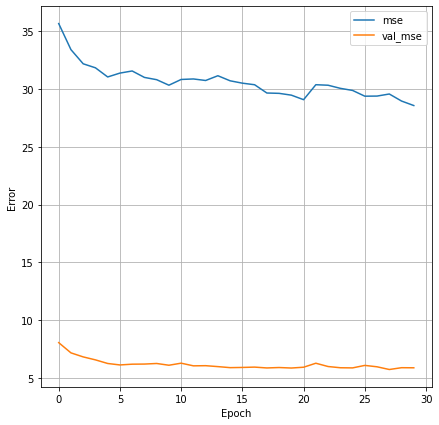

In [ ]:
def plot_loss(history):
  fig = plt.figure(figsize=(7,7))
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
predicted_stock_price = keras_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predicted_stock_price)/len(y_test)

0.008480172205452967